In [2]:
import requests
from pathlib import Path

BASE = "https://cdn.weatherapi.com/weather/64x64"
OUT = Path("icons")


In [3]:
import json
with open('weather_codes.json', 'r') as f:
	CODE_LIST = json.load(f)
CODE_LIST[0]

{'code': 1000, 'day': 'Sunny', 'night': 'Clear', 'icon': 113}

In [4]:
for c in CODE_LIST:
	code = c['code']
	

In [5]:
CODE_LIST

[{'code': 1000, 'day': 'Sunny', 'night': 'Clear', 'icon': 113},
 {'code': 1003, 'day': 'Partly cloudy', 'night': 'Partly cloudy', 'icon': 116},
 {'code': 1006, 'day': 'Cloudy', 'night': 'Cloudy', 'icon': 119},
 {'code': 1009, 'day': 'Overcast', 'night': 'Overcast', 'icon': 122},
 {'code': 1030, 'day': 'Mist', 'night': 'Mist', 'icon': 143},
 {'code': 1063,
  'day': 'Patchy rain possible',
  'night': 'Patchy rain possible',
  'icon': 176},
 {'code': 1066,
  'day': 'Patchy snow possible',
  'night': 'Patchy snow possible',
  'icon': 179},
 {'code': 1069,
  'day': 'Patchy sleet possible',
  'night': 'Patchy sleet possible',
  'icon': 182},
 {'code': 1072,
  'day': 'Patchy freezing drizzle possible',
  'night': 'Patchy freezing drizzle possible',
  'icon': 185},
 {'code': 1087,
  'day': 'Thundery outbreaks possible',
  'night': 'Thundery outbreaks possible',
  'icon': 200},
 {'code': 1114, 'day': 'Blowing snow', 'night': 'Blowing snow', 'icon': 227},
 {'code': 1117, 'day': 'Blizzard', 'nigh

In [60]:
import glob

file_names = glob.glob('icons/*')
icon_names = [x[9:-4] for x in file_names]
day_night = ['day' if 'day' in x else 'night' if 'night' in x else None for x in icon_names]
weather_status = [x[4:] if 'day' in x else x[6:] if 'night' in x else x for x in icon_names]
weather_status = [x.replace('-', ' ') for x in weather_status]
icon_pack = pd.DataFrame(zip(file_names, icon_names, day_night, weather_status), columns=['file_name','icon_name','day_night', 'weather_status'])
icon_pack.sample(10)


,file_name,icon_name,day_night,weather_status
72,icons\wi-moon-alt-waxing-crescent-3.png,moon-alt-waxing-crescent-3,None,moon alt waxing crescent 3
99,icons\wi-moon-waxing-crescent-1.png,moon-waxing-crescent-1,None,moon waxing crescent 1
180,icons\wi-thunderstorm.png,thunderstorm,None,thunderstorm
125,icons\wi-night-alt-sleet.png,night-alt-sleet,night,alt sleet
157,icons\wi-raindrops.png,raindrops,None,raindrops
120,icons\wi-night-alt-rain-mix.png,night-alt-rain-mix,night,alt rain mix
27,icons\wi-day-windy.png,day-windy,day,windy
161,icons\wi-showers.png,showers,None,showers
170,icons\wi-sprinkle.png,sprinkle,None,sprinkle
142,icons\wi-night-rain-wind.png,night-rain-wind,night,rain wind


In [61]:
import pandas as pd

api_codes = pd.DataFrame(CODE_LIST)
api_codes['day'] = api_codes['day'].str.lower()
api_codes['night'] = api_codes['night'].str.lower()
day_icons = api_codes.merge(icon_pack.loc[icon_pack.day_night=='day'], left_on=['day'], right_on=['weather_status'])
night_icons = api_codes.merge(icon_pack.loc[icon_pack.day_night=='night'], left_on=['night'], right_on=['weather_status'])
day_icons

,code,day,night,icon,file_name,icon_name,day_night,weather_status
0,1000,sunny,clear,113,icons\wi-day-sunny.png,day-sunny,day,sunny
1,1006,cloudy,cloudy,119,icons\wi-day-cloudy.png,day-cloudy,day,cloudy
2,1135,fog,fog,248,icons\wi-day-fog.png,day-fog,day,fog


In [67]:
api_codes.to_csv('api_codes.csv')

In [63]:
api_codes.loc[api_codes['day'].str.contains('rain')]

,code,day,night,icon
5,1063,patchy rain possible,patchy rain possible,176
18,1180,patchy light rain,patchy light rain,293
19,1183,light rain,light rain,296
20,1186,moderate rain at times,moderate rain at times,299
21,1189,moderate rain,moderate rain,302
22,1192,heavy rain at times,heavy rain at times,305
23,1195,heavy rain,heavy rain,308
24,1198,light freezing rain,light freezing rain,311
25,1201,moderate or heavy freezing rain,moderate or heavy freezing rain,314
35,1240,light rain shower,light rain shower,353


In [77]:
icon_pack.loc[icon_pack['icon_name'].str.contains('rain', na=False)]

,file_name,icon_name,day_night,weather_status
13,icons\wi-day-rain-mix.png,day-rain-mix,day,rain mix
14,icons\wi-day-rain-wind.png,day-rain-wind,day,rain wind
15,icons\wi-day-rain.png,day-rain,day,rain
120,icons\wi-night-alt-rain-mix.png,night-alt-rain-mix,night,alt rain mix
121,icons\wi-night-alt-rain-wind.png,night-alt-rain-wind,night,alt rain wind
122,icons\wi-night-alt-rain.png,night-alt-rain,night,alt rain
141,icons\wi-night-rain-mix.png,night-rain-mix,night,rain mix
142,icons\wi-night-rain-wind.png,night-rain-wind,night,rain wind
143,icons\wi-night-rain.png,night-rain,night,rain
153,icons\wi-rain-mix.png,rain-mix,None,rain mix


In [65]:
icon_pack['weather_status']

0             cloud
1      cloudy gusts
2      cloudy windy
3            cloudy
4      cloudy gusts
           ...     
182         tsunami
183        umbrella
184         volcano
185        wind deg
186           windy
Name: weather_status, Length: 187, dtype: object

In [91]:
handwritten = pd.read_csv('api_codes.csv', index_col=0)
final_day = handwritten.merge(icon_pack.loc[icon_pack.day_night=='night'], left_on=['night_weather'], right_on=['weather_status'], how='left')[['code','day_night','file_name','icon_name']]
final_night = handwritten.merge(icon_pack.loc[icon_pack.day_night=='day'], left_on=['day_weather'], right_on=['weather_status'], how='left')[['code','day_night','file_name','icon_name']]

In [93]:
df = pd.concat((final_day, final_night))
df

,code,day_night,file_name,icon_name
0,1000,night,icons\wi-night-clear.png,night-clear
1,1003,night,icons\wi-night-cloudy.png,night-cloudy
2,1006,night,icons\wi-night-cloudy.png,night-cloudy
3,1009,night,icons\wi-night-cloudy.png,night-cloudy
4,1030,night,icons\wi-night-fog.png,night-fog
...,...,...,...,...
43,1264,day,icons\wi-day-hail.png,day-hail
44,1273,day,icons\wi-day-thunderstorm.png,day-thunderstorm
45,1276,day,icons\wi-day-thunderstorm.png,day-thunderstorm
46,1279,day,icons\wi-day-thunderstorm.png,day-thunderstorm


In [95]:
df.loc[
	(df.code==1000)
]

,code,day_night,file_name,icon_name
0,1000,night,icons\wi-night-clear.png,night-clear
0,1000,day,icons\wi-day-sunny.png,day-sunny


In [116]:
# convert to nested dict: mydict[code][day_night]
icon_dict = (
    df.groupby("code")
      .apply(lambda x: dict(zip(x["day_night"], x["file_name"])))
      .to_dict()
)

# save to json
with open("icon_lookup.json", "w") as f:
    json.dump(icon_dict, f, indent=2)

# ---- load later ----
with open("icon_lookup.json") as f:
    loaded = json.load(f)

# convert keys back to int if needed
#loaded = {int(k): v for k, v in loaded.items()}

# usage
loaded['1003']["day"]

C:\Users\Sharedw\AppData\Local\Temp\ipykernel_32304\737586466.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: dict(zip(x["day_night"], x["file_name"])))


'icons\\wi-day-cloudy.png'

Windows
handler created
EPD initialized (mock)
EPD cleared (mock)
drawer created
             cst_time  tempf   mov
0 2026-01-03 08:51:00   55.6  55.6
{'dateutc': 1767451860000, 'tempf': 55.6, 'humidity': 73, 'windspeedmph': 1.34, 'windgustmph': 2.24, 'maxdailygust': 13.65, 'winddir': 236, 'uv': 0, 'solarradiation': 91.89, 'hourlyrainin': 0, 'eventrainin': 0, 'dailyrainin': 0, 'weeklyrainin': 0, 'monthlyrainin': 0, 'totalrainin': 101.362, 'battout': 1, 'tempinf': 69.1, 'humidityin': 59, 'baromrelin': 29.651, 'baromabsin': 28.848, 'feelsLike': 55.6, 'dewPoint': 47.08, 'feelsLikein': 68.5, 'dewPointin': 54.2, 'lastRain': '2025-12-17T20:44:00.000Z', 'tz': 'America/Chicago', 'date': '2026-01-03T14:51:00.000Z', 'text': 'Sunny', 'icon': '//cdn.weatherapi.com/weather/64x64/day/113.png', 'code': 1000, 'alert': ''}


FileNotFoundError: [Errno 2] No such file or directory: 'icons/day/rainy.png'

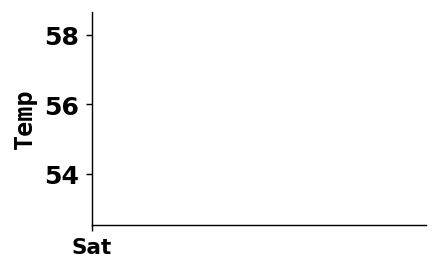

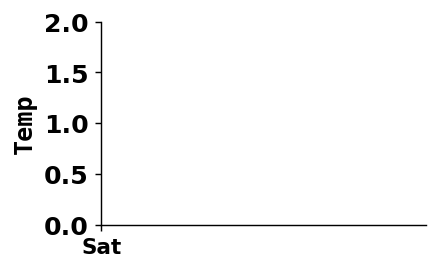

In [1]:
from DataHandler import DataHandler
from Draw import DataDrawer
from time import sleep # noqa


dhandler = DataHandler()
print('handler created')
dDrawer = DataDrawer()
print('drawer created')

curr_data = dhandler.fetch_all(cache=False)
#just save matplotlib plots
print(curr_data)
dDrawer.draw_weather(curr_data)


In [10]:
code, icon = curr_data['code'], curr_data['icon']
icon = 'day' if 'day' in icon else 'night' if 'night' in icon else None

In [11]:
curr_data

{'dateutc': 1767451860000,
 'tempf': 55.6,
 'humidity': 73,
 'windspeedmph': 1.34,
 'windgustmph': 2.24,
 'maxdailygust': 13.65,
 'winddir': 236,
 'uv': 0,
 'solarradiation': 91.89,
 'hourlyrainin': 0,
 'eventrainin': 0,
 'dailyrainin': 0,
 'weeklyrainin': 0,
 'monthlyrainin': 0,
 'totalrainin': 101.362,
 'battout': 1,
 'tempinf': 69.1,
 'humidityin': 59,
 'baromrelin': 29.651,
 'baromabsin': 28.848,
 'feelsLike': 55.6,
 'dewPoint': 47.08,
 'feelsLikein': 68.5,
 'dewPointin': 54.2,
 'lastRain': '2025-12-17T20:44:00.000Z',
 'tz': 'America/Chicago',
 'date': '2026-01-03T14:51:00.000Z',
 'text': 'Sunny',
 'icon': '//cdn.weatherapi.com/weather/64x64/day/113.png',
 'code': 1000,
 'alert': ''}

In [18]:
import json
with open("icon_lookup.json") as f:
    loaded = json.load(f)

# convert keys back to int if needed
loaded = {int(k): v for k, v in loaded.items()}


In [19]:
loaded[code][icon]

'icons\\wi-day-sunny.png'